In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

In [3]:
## takes forever to run
# Set the base URL for the API
BASE_URL = "https://rest.genenames.org"

# Define a function to get the protein for a gene
def get_protein(gene_symbol):
    url = f"{BASE_URL}/fetch/symbol/{gene_symbol}"
    headers = {
        "Accept": "application/json"
    }
    response = requests.get(url, headers=headers)
    data = response.json()
    protein = data.get("response", {}).get("docs", [])[0].get("uniprot_ids", [])
    return protein

# Define a function to create the knowledge graph for all human genes
# def create_knowledge_graph():
#     # Create an empty graph
#     G = nx.Graph()

#     # Retrieve all human gene symbols
#     url = f"{BASE_URL}/fetch/status/Approved"
#     headers = {
#         "Accept": "application/json"
#     }
#     response = requests.get(url, headers=headers)
#     data = response.json()
#     gene_symbols = [doc.get("symbol") for doc in data.get("response", {}).get("docs", [])]

#     # Add each gene and its protein to the graph
#     for gene_symbol in gene_symbols:
#         G.add_node(gene_symbol, type="gene")
#         proteins = get_protein(gene_symbol)
#         for p in proteins:
#             G.add_node(p, type="protein")
#             G.add_edge(gene_symbol, p, type="expression")

#     return G

# # Example usage
# G = create_knowledge_graph()

# # Print the nodes and edges of the graph
# print("Nodes:", G.nodes)
# print("Edges:", G.edges)

In [4]:
# Create an empty graph
G = nx.Graph()

# Retrieve all human gene symbols
url = f"{BASE_URL}/fetch/status/Approved"
headers = {
    "Accept": "application/json"
}
response = requests.get(url, headers=headers)
data = response.json()
gene_symbols = [doc.get("symbol") for doc in data.get("response", {}).get("docs", [])]

 

In [5]:
# Add each gene and its protein to the graph
for gene_symbol in gene_symbols[1:100]:
    # I just take the first 10 genes to make it faster
    G.add_node(gene_symbol, type="gene")
    proteins = get_protein(gene_symbol)
    for p in proteins:
        G.add_node(p, type="protein")
        G.add_edge(gene_symbol, p, type="expression")
#2m 23.8s for 100 genes

In [6]:
print("Nodes:", G.nodes)
print("Edges:", G.edges)

Nodes: ['A1BG-AS1', 'A1CF', 'Q9NQ94', 'A2M', 'P01023', 'A2M-AS1', 'A2ML1', 'A8K2U0', 'A2ML1-AS1', 'A2ML1-AS2', 'A2MP1', 'A3GALT2', 'U3KPV4', 'A4GALT', 'Q9NPC4', 'A4GNT', 'Q9UNA3', 'AAAS', 'Q9NRG9', 'AACS', 'Q86V21', 'AACSP1', 'AADAC', 'P22760', 'AADACL2', 'Q6P093', 'AADACL2-AS1', 'AADACL3', 'Q5VUY0', 'AADACL4', 'Q5VUY2', 'AADACP1', 'AADAT', 'Q8N5Z0', 'AAGAB', 'Q6PD74', 'AAK1', 'Q2M2I8', 'AAMDC', 'Q9H7C9', 'AAMP', 'Q13685', 'AANAT', 'Q16613', 'AAR2', 'Q9Y312', 'AARD', 'Q4LEZ3', 'AARS1', 'P49588', 'AARS1P1', 'AARS2', 'Q5JTZ9', 'AARSD1', 'Q9BTE6', 'AARSD1P1', 'AASDH', 'Q4L235', 'AASDHPPT', 'Q9NRN7', 'AASS', 'Q9UDR5', 'AATBC', 'AATF', 'Q9NY61', 'AATK', 'Q6ZMQ8', 'AAVS1', 'ABALON', 'ABAT', 'P80404', 'ABCA1', 'O95477', 'ABCA2', 'Q9BZC7', 'ABCA3', 'Q99758', 'ABCA3P1', 'ABCA4', 'P78363', 'ABCA5', 'Q8WWZ7', 'ABCA6', 'Q8N139', 'ABCA7', 'Q8IZY2', 'ABCA8', 'O94911', 'ABCA9', 'Q8IUA7', 'ABCA9-AS1', 'ABCA10', 'Q8WWZ4', 'ABCA11P', 'ABCA12', 'Q86UK0', 'ABCA13', 'Q86UQ4', 'ABCA15P', 'ABCA17P', 'ABCB1',

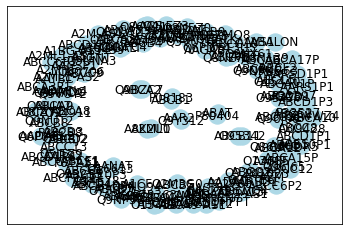

In [7]:
# Set up the layout for the graph
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()